    INFO : 2020-05-20 07:06:51,577 : start: calc_avg_score
    INFO : 2020-05-20 07:06:52,745 : score[  0]: 0.05702
    INFO : 2020-05-20 07:06:53,862 : score[  1]: 0.06295
    INFO : 2020-05-20 07:06:54,948 : score[  2]: 0.06181
    INFO : 2020-05-20 07:06:56,065 : score[  3]: 0.06191
    INFO : 2020-05-20 07:06:57,160 : score[  4]: 0.06227
    INFO : 2020-05-20 07:06:58,264 : score[  5]: 0.06002
    INFO : 2020-05-20 07:06:59,349 : score[  6]: 0.06362
    INFO : 2020-05-20 07:07:00,458 : score[  7]: 0.06005
    INFO : 2020-05-20 07:07:01,554 : score[  8]: 0.06277
    INFO : 2020-05-20 07:07:02,647 : score[  9]: 0.06507
    INFO : 2020-05-20 07:07:03,734 : score[ 10]: 0.06253
    INFO : 2020-05-20 07:07:04,827 : score[ 11]: 0.06355
    INFO : 2020-05-20 07:07:05,919 : score[ 12]: 0.06152
    INFO : 2020-05-20 07:07:07,017 : score[ 13]: 0.06306
    INFO : 2020-05-20 07:07:08,104 : score[ 14]: 0.06035
    INFO : 2020-05-20 07:07:09,214 : score[ 15]: 0.06405
    INFO : 2020-05-20 07:07:1

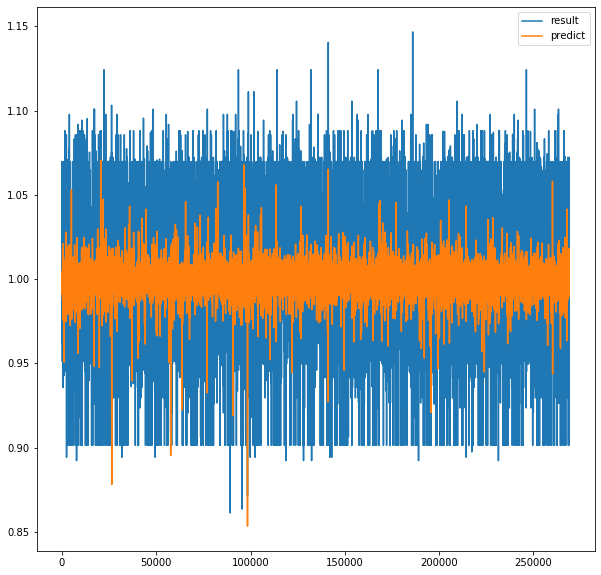

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(x, y_result, y_predict):
    _, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result, label='result')
    ax1.plot(list(range(len(x))), y_predict, label='predict')
    ax1.legend()
    plt.show()

def main():
    file_name = "v0.0.11-test"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    # 最後20%のデータでテスト
    test_start = int(len(csv) * 0.8)
    csv = csv[:test_start]

    bitcoin.calc_avg_score(csv)
    (
        data_train,
        data_test,
        label_train,
        label_test,
    ) = bitcoin.set_train_test_dataset(csv, 0.2)
    model = bitcoin.create_model(data_train, label_train)

    x = data_test#[-3500:]
    y_result = list(label_test)#[-3500:]
    y_predict = list(model.predict(x))
    plot(x, y_result, y_predict)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(model, file)
    

if __name__ == "__main__":
    main()

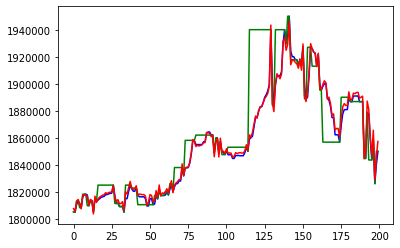

In [2]:
from mylib import bitcoin

file_name = "v0.0.11-test"
csv = pd.read_csv("datasets/" + file_name + ".csv")
with open("models/" + file_name + ".pickle", mode="rb") as file:
    model = pickle.load(file)

x = csv[416800:417000]
x.reset_index(drop=True, inplace=True)
y_close = list(x["close"])
y_extreme60 = list(x["open"] * x["next_extreme"])
p = list(model.predict(x[bitcoin.TRAIN_COLUMNS]))
pred = pd.DataFrame(p)
pred.columns = ["pred"]
y_predict = pred["pred"] * x["open"]

#_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
plt.plot(list(range(len(x))), y_close, color="blue", label='close')
plt.plot(list(range(len(x))), y_extreme60, color="green", label='result')
plt.plot(list(range(len(x))), y_predict, color="red", label='predict')
plt.show()